In [144]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import seaborn as sns

In [2]:
data_path = 'sinps'

def prep_fn(img):
    img = img.astype(np.float32) / 255.0
    return img

datagen = ImageDataGenerator(preprocessing_function=prep_fn)

train_batch = datagen.flow_from_directory(directory=data_path,target_size=(256,256),class_mode='input',shuffle=False,
                                            color_mode= 'grayscale',classes=None,batch_size=32)

Found 5 images belonging to 1 classes.


In [3]:
def scale(A):
    return (A-np.min(A))/(np.max(A) - np.min(A))

In [4]:
images, labels = next(train_batch)

In [5]:
relevance = []
for i in range(5):
    relevance.append(scale(images[i,:,:,0]))
relevance = np.array(relevance)

NameError: name 'file_names' is not defined

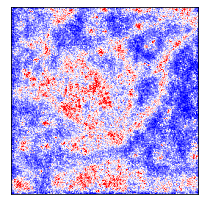

In [6]:
plt.figure(figsize=(20,20))
for i in range(5):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(relevance[i,:,:], cmap='bwr',vmin=0.1,vmax=0.5)
    plt.xlabel(file_names[i])
plt.show()

In [7]:
m = relevance.shape[0] # m - num_of_images
n = relevance.shape[1]*relevance.shape[1] # n - num_of_columns
print(m,n)

5 65536


In [8]:
R = np.reshape(relevance, [m, n]) # R - flattened relevance values
np.savetxt("relevance_cpa.csv", R, delimiter=",")

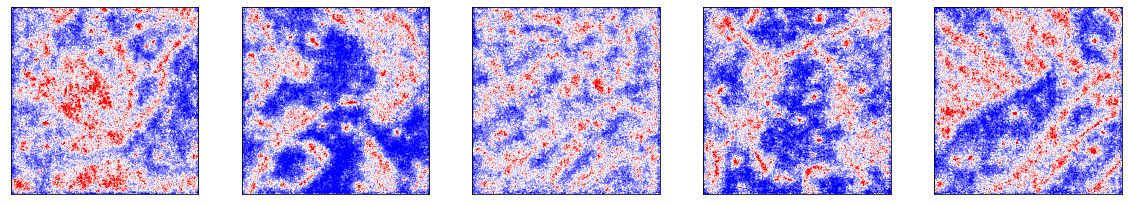

In [16]:
plt.figure(figsize=(20,20))
for i in range(5):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    img = plt.imshow(relevance[i,:,:], interpolation='bilinear',vmin=0.1,vmax=0.45)
    img.set_cmap('bwr',)
    #plt.imshow(relevance[i,:,:], cmap='bwr',vmin=0.1,vmax=0.5)
plt.show()

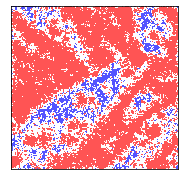

In [17]:
plt.figure(figsize=(3,3))
levels = np.arange(0.1, 0.45, 0.05)
levels = [0.1,0.2,0.3,0.4]
for i in range(5):
    Z = relevance[i,:,:]
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.contourf(Z, levels, origin='upper',cmap='bwr', extent=(0, 255, 0,255))
    plt.savefig('smaps/sm_cpa1_'+str(i+1)+'.jpeg', bbox_inches='tight',pad_inches=0,dpi=300)

In [14]:
from astropy.convolution import convolve
from astropy.convolution.kernels import Gaussian2DKernel
g = Gaussian2DKernel(1)

for i in range(5):
    heatmap=convolve(relevance[i,:,:], g)
    name = 'smaps/smp_cpa_' + str(i+1) + '.jpeg'
    #plt.figure(figsize=(3,3))
    plt.figure(dpi=600)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(heatmap, cmap='bwr',vmin=0.15,vmax=0.4)
    plt.savefig(name,bbox_inches='tight',pad_inches=0)
    plt.close()

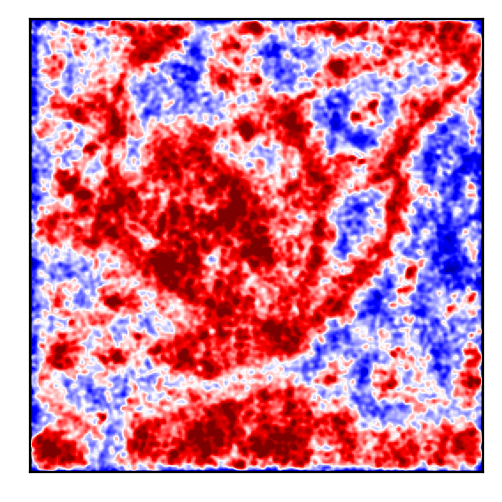

In [142]:
i=0
from matplotlib.colors import LinearSegmentedColormap
g = Gaussian2DKernel(1)
heatmap=scale(convolve(relevance[i,:,:], g))
plt.figure(figsize=(3,3),dpi=200)
plt.axes()
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(heatmap, cmap='seismic', vmin=0, vmax=0.6)
name = 'smaps/smp_cpa_' + str(i+1) + '.jpeg'
plt.savefig(name,bbox_inches='tight',pad_inches=0.0)
plt.show()

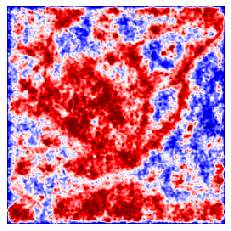

In [188]:
sns.set()
i=0
from matplotlib.colors import LinearSegmentedColormap
g = Gaussian2DKernel(1)
heatmap=scale(convolve(relevance[i,:,:], g))
ax = sns.heatmap(heatmap,cbar = False, square = True,cmap ='seismic',vmin=0., vmax=0.6)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.show()
fig = ax.get_figure()
name = 'smaps/smp_cpa_' + str(i+1) + '.tiff'
fig.savefig(name,bbox_inches='tight',pad_inches=0,dpi=200) 

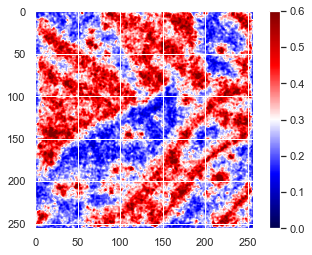

In [192]:
from matplotlib.colors import LinearSegmentedColormap
g = Gaussian2DKernel(0.8)
#colors = ['w','y','r']
colors = [(0, 0, 1),(0, 0, 1),(0, 0, 1),(0, 0, 1),(1, 1, 1),(1, 1, 1),(1, 0, 0),(1, 0, 0)]
#colors = [(0, 0, 0),(0, 0, 0),(0, 0, 0),(0, 0, 0),(1, 1, 1),(1, 1, 1),(1, 0, 0),(1, 0, 0)]
colors = [(1, 1, 1),(1, 1, 1),(1, 1, 1),(1, 1, 1),(0, 0, 1),(0, 0, 1),(1, 0, 0),(1, 0, 0)]
n_bins = [3, 6, 10, 100]  # Discretizes the interpolation into bins
cmap_name = 'my_list'
cmap = LinearSegmentedColormap.from_list(cmap_name, colors, 8)
heatmap=scale(convolve(relevance[4,:,:], g))
levels = [0.2,0.3,0.4]
plt.imshow(heatmap, cmap='seismic', vmin=0, vmax=0.6)
plt.colorbar()
plt.show()

In [ ]:
heatmap=relevance[0,:,:]
fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.imshow(heatmap, interpolation='none')
from astropy.convolution import convolve
from astropy.convolution.kernels import Gaussian2DKernel
ax2.imshow(convolve(heatmap, Gaussian2DKernel(2)),interpolation='none')

plt.show()

In [ ]:
np.min(heatmap)